In [48]:
import os
import requests
from io import BytesIO
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


Тк Бостон недоступен, в подсказках error было указано что можно использовать Калифорнию

In [55]:
df = pd.read_csv('california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [56]:
# Подготовка данных
X = housing_data.drop(columns=['median_house_value'])
y = housing_data['median_house_value']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

In [57]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

# Интерпретация коэффициентов
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 4634658406.2233
R^2 Score: 0.6636
              Feature   Coefficient
0           longitude -43465.247687
1            latitude -43106.304441
2  housing_median_age   1131.724382
3         total_rooms     -8.843261
4      total_bedrooms    113.707973
5          population    -35.657077
6          households     45.147555
7       median_income  40194.726347


Text(0.5, 1.0, 'Фактические vs Предсказанные значения')

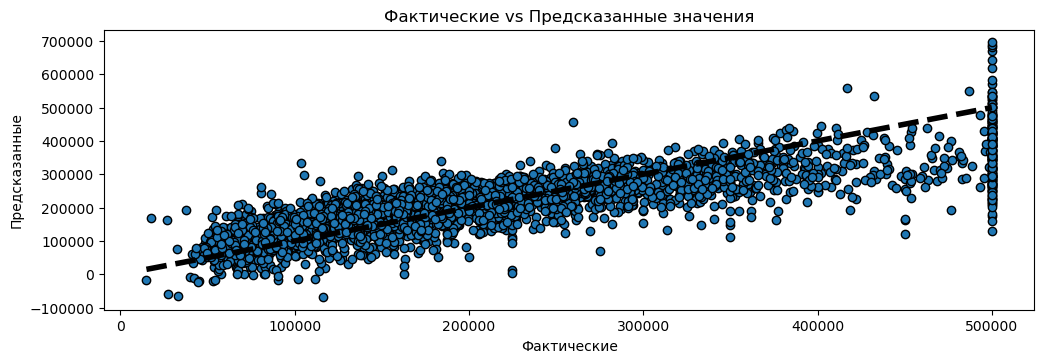

In [58]:
# Визуализация результатов
plt.figure(figsize=(12, 8))

# Фактические vs предсказанные значения
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Фактические')
plt.ylabel('Предсказанные')
plt.title('Фактические vs Предсказанные значения')

D:\Users\aomurbaeva\AppData\Local\anaconda3\envs\ds-course\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


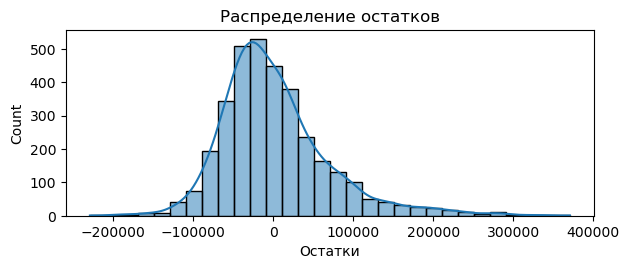

In [59]:
# Остатки
plt.subplot(2, 1, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Остатки')
plt.title('Распределение остатков')

plt.tight_layout()
plt.show()


In [60]:
# Использование statsmodels для детального анализа
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2959.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:38:08   Log-Likelihood:            -1.7099e+05
No. Observations:               13600   AIC:                         3.420e+05
Df Residuals:                   13591   BIC:                         3.421e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.652e+06   7.79